In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import colors, patheffects
from string import ascii_lowercase as abcd
from mpl_toolkits.axes_grid1 import make_axes_locatable
import cartopy.crs as ccrs
import sys
sys.path.append(r'C:\Users\lelise\Documents\GitHub\flood_model_carolinas\pgw_tc_cmpdfld\sfincs_output')
from pgw_utils import *

In [2]:
# This script classifies the driver of peak water levels for each PGW run
# This script outputs a netcdf with the driver classification and a CSV with peak flood extent total areas
os.chdir(r'Z:\Data-Expansion\users\lelise\projects\Carolinas_SFINCS\Chapter2_PGW\sfincs\03_OBS\analysis_3\process_attribution')

# Flooding was attributed to processes at the grid scale. The total number of cells is used to calculate the contribution
# of each flood process to the total area of the peak flood extent
df = pd.read_csv('fldArea_by_process.csv', index_col=0)
fld_area_df = cleanup_flood_area_dataframe(df)
print(fld_area_df)

                   Coastal    Runoff  Compound     Total storm climate  \
flor_pres          6583.32  63213.32   6498.56  76295.20  flor    pres   
floy_pres          8302.72  63516.08   3597.48  75416.28  floy    pres   
matt_pres          6966.28  64793.56   5788.56  77548.40  matt    pres   
flor_fut_SF1_SLR1  7256.76  61103.56   8813.60  77173.92  flor     fut   
flor_fut_SF1_SLR2  7124.28  61409.80   8638.00  77172.08  flor     fut   
...                    ...       ...       ...       ...   ...     ...   
matt_fut_SF6_SLR1  7576.80  63176.96   7017.12  77770.88  matt     fut   
matt_fut_SF6_SLR2  7923.64  62874.48   6978.12  77776.24  matt     fut   
matt_fut_SF6_SLR3  8120.44  62618.32   7040.20  77778.96  matt     fut   
matt_fut_SF6_SLR4  8378.32  62321.44   7082.92  77782.68  matt     fut   
matt_fut_SF6_SLR5  9069.68  61959.72   6757.32  77786.72  matt     fut   

                       group  
flor_pres          flor pres  
floy_pres          floy pres  
matt_pres         

In [3]:
# Subset by present
pres_area = fld_area_df[fld_area_df['climate'] == 'pres']
print(pres_area.index)
# Subset by future only
da_plot = fld_area_df.drop(fld_area_df[fld_area_df['climate'] == 'pres'].index)
print(da_plot.index)

Index(['flor_pres', 'floy_pres', 'matt_pres'], dtype='object')
Index(['flor_fut_SF1_SLR1', 'flor_fut_SF1_SLR2', 'flor_fut_SF1_SLR3',
       'flor_fut_SF1_SLR4', 'flor_fut_SF1_SLR5', 'flor_fut_SF2_SLR1',
       'flor_fut_SF2_SLR2', 'flor_fut_SF2_SLR3', 'flor_fut_SF2_SLR4',
       'flor_fut_SF2_SLR5', 'flor_fut_SF3_SLR1', 'flor_fut_SF3_SLR2',
       'flor_fut_SF3_SLR3', 'flor_fut_SF3_SLR4', 'flor_fut_SF3_SLR5',
       'flor_fut_SF4_SLR1', 'flor_fut_SF4_SLR2', 'flor_fut_SF4_SLR3',
       'flor_fut_SF4_SLR4', 'flor_fut_SF4_SLR5', 'flor_fut_SF5_SLR1',
       'flor_fut_SF5_SLR2', 'flor_fut_SF5_SLR3', 'flor_fut_SF5_SLR4',
       'flor_fut_SF5_SLR5', 'flor_fut_SF6_SLR1', 'flor_fut_SF6_SLR2',
       'flor_fut_SF6_SLR3', 'flor_fut_SF6_SLR4', 'flor_fut_SF6_SLR5',
       'flor_fut_SF7_SLR1', 'flor_fut_SF7_SLR2', 'flor_fut_SF7_SLR3',
       'flor_fut_SF7_SLR4', 'flor_fut_SF7_SLR5', 'floy_fut_SF1_SLR1',
       'floy_fut_SF1_SLR2', 'floy_fut_SF1_SLR3', 'floy_fut_SF1_SLR4',
       'floy_fut_SF1_SLR5',

In [4]:
# Plotting info
scenarios = ['Coastal', 'Runoff', 'Compound', 'Total']
nrow = 4
ncol = 1

font = {'family': 'Arial', 'size': 10}
mpl.rc('font', **font)
mpl.rcParams.update({'axes.titlesize': 10})
mpl.rcParams["figure.autolayout"] = True

n_subplots = nrow * ncol
first_in_row = np.arange(0, n_subplots, ncol)
last_in_row = np.arange(ncol - 1, n_subplots, ncol)
first_row = np.arange(0, ncol)
last_row = np.arange(first_in_row[-1], n_subplots, 1)

props = dict(boxes="white", whiskers="black", caps="black")
boxprops = dict(facecolor='white', linestyle='--', linewidth=1, color='black')
flierprops = dict(marker='o', markerfacecolor='none', markersize=6, markeredgecolor='black')
medianprops = dict(linestyle='-', linewidth=2, color='black')
meanpointprops = dict(marker='D', markeredgecolor='black', markerfacecolor='lightgrey', markersize=6)

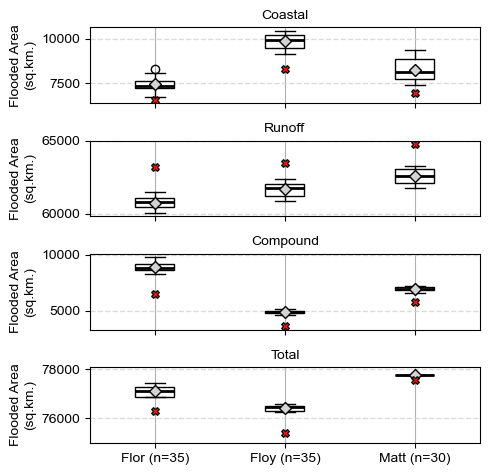

In [5]:
# PLOTTING Boxplot of flooded area
fig, axes = plt.subplots(nrows=nrow, ncols=ncol, tight_layout=True, figsize=(5, 5))
axes = axes.flatten()
counter = 0
for ax in axes:
    bp = da_plot.boxplot(ax=ax,
                         by='group',
                         column=scenarios[counter],
                         vert=True,
                         color=props,
                         boxprops=boxprops,
                         flierprops=flierprops,
                         medianprops=medianprops,
                         meanprops=meanpointprops,
                         meanline=False,
                         showmeans=True,
                         patch_artist=True,
                         layout=(3, 1),
                         zorder=1
                         )
    ax.scatter(x=ax.get_xticks(), y=pres_area[scenarios[counter]].values,
               s=30, color='red', marker='X', zorder=2, edgecolor='black', alpha=0.9)
    if counter == 3:
        ax.set_ylim(75000, 78100)

    if counter in last_row:
        xtick = ax.get_xticks()
        ax.set_xticklabels(['Flor (n=35)',
                            'Floy (n=35)',
                            'Matt (n=30)'])
    else:
        ax.xaxis.set_tick_params(labelbottom=False)
    ax.set_title(scenarios[counter])
    ax.set_xlabel(None)
    ax.set_ylabel('Flooded Area\n(sq.km.)')
    kwargs = dict(linestyle='--', linewidth=1, color='lightgrey', alpha=0.8)
    ax.grid(visible=True, which='major', axis='y', zorder=0, **kwargs)
    kwargs = dict(linestyle='--', linewidth=0.5, color='lightgrey', alpha=0.8)
    ax.grid(visible=True, which='minor', axis='y', zorder=0, **kwargs)
    ax.set_axisbelow(True)
    counter += 1

plt.suptitle(None)
plt.subplots_adjust(wspace=0, hspace=0)
plt.margins(x=0, y=0)
plt.savefig('driver_fldArea_boxplot_ensmean.png', dpi=255)
#plt.close()

In [7]:
for storm in fld_area_df.storm.unique():
    for climate in fld_area_df.climate.unique():
        sub = da_plot[da_plot['storm'] == storm][da_plot['climate'] == climate]
        if climate == 'fut':
            stats = sub.describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95])
            stats.to_csv(f'{storm}_{climate}_driver_fldArea_stats.csv')
print(stats.round(0))

       Coastal   Runoff  Compound    Total
count     30.0     30.0      30.0     30.0
mean    8263.0  62587.0    6926.0  77776.0
std      637.0    491.0     179.0     11.0
min     7395.0  61793.0    6561.0  77753.0
5%      7462.0  61831.0    6587.0  77756.0
25%     7767.0  62106.0    6806.0  77770.0
50%     8139.0  62611.0    6970.0  77780.0
75%     8873.0  63080.0    7073.0  77785.0
95%     9262.0  63204.0    7133.0  77789.0
max     9344.0  63273.0    7163.0  77792.0
